In [ ]:
##########
# Hexagons with homicide decrease/without homicide waves
%pwd

'/home/nitomanto/decreasing-homicide-waves'

In [60]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import re
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import shapely
import seaborn as sns

In [3]:
df = gpd.read_file('/home/nitomanto/anita-ujp-homicide/hexhom.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head(6)

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geom1,geom2,geom3,geom4,geom5,geom6,geom7,geom8,geom9,geom10,geom11,geom12,geom13,geom14
0,AJ-37,1874,0,0,NA,list(c(-87.6186904368855,-87.6216943961905,-87.6277023148006,-87.6307062741056,-87.6277023148006,-87.6216943961905,-87.6186904368855,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
1,AK-37,1874,0,4.19822270593398,0,list(c(-87.6096785589704,-87.6126825182754,-87.6186904368855,-87.6216943961905,-87.6186904368855,-87.6126825182754,-87.6096785589704,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))
2,AL-37,1874,0,0.001777294066012,0,list(c(-87.6006666810553,-87.6036706403603,-87.6096785589704,-87.6126825182754,-87.6096785589704,-87.6036706403603,-87.6006666810553,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
3,AM-37,1874,0,0,NA,list(c(-87.5916548031402,-87.5946587624452,-87.6006666810553,-87.6036706403603,-87.6006666810553,-87.5946587624452,-87.5916548031402,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))
4,AN-37,1874,0,0,NA,list(c(-87.5826429252251,-87.5856468845301,-87.5916548031402,-87.5946587624452,-87.5916548031402,-87.5856468845301,-87.5826429252251,41.6497461319232,41.6445431217832,41.6445431217832,41.6497461319232,41.6549491420635,41.6549491420635,41.6497461319232))
5,AO-37,1874,0,0,NA,list(c(-87.5736310473101,-87.576635006615,-87.5826429252251,-87.5856468845301,-87.5826429252251,-87.576635006615,-87.5736310473101,41.6445431217832,41.6393401116429,41.6393401116429,41.6445431217832,41.6497461319232,41.6497461319232,41.6445431217832))


In [6]:
df.geom1.dtype

dtype('O')

In [7]:
df['geom1'] = df.apply(lambda row: re.sub(r'[a-z*+*a-z*+*]', '', row.geom1), axis=1)
df['geom1'] = df.apply(lambda row: row.geom1[2:], axis=1)

In [8]:
df['geom14'] = df.apply(lambda row: row.geom14[:-2], axis=1)

In [9]:
for n in range(1,15):
    df[f'geom{n}'] = df[f'geom{n}'].astype(float)

In [10]:
df.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geom1,geom2,geom3,geom4,geom5,geom6,geom7,geom8,geom9,geom10,geom11,geom12,geom13,geom14
0,AJ-37,1874,0,0,NA,-87.618690,-87.621694,-87.627702,-87.630706,-87.627702,-87.621694,-87.618690,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746
1,AK-37,1874,0,4.19822270593398,0,-87.609679,-87.612683,-87.618690,-87.621694,-87.618690,-87.612683,-87.609679,41.644543,41.639340,41.639340,41.644543,41.649746,41.649746,41.644543
2,AL-37,1874,0,0.001777294066012,0,-87.600667,-87.603671,-87.609679,-87.612683,-87.609679,-87.603671,-87.600667,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746
3,AM-37,1874,0,0,NA,-87.591655,-87.594659,-87.600667,-87.603671,-87.600667,-87.594659,-87.591655,41.644543,41.639340,41.639340,41.644543,41.649746,41.649746,41.644543
4,AN-37,1874,0,0,NA,-87.582643,-87.585647,-87.591655,-87.594659,-87.591655,-87.585647,-87.582643,41.649746,41.644543,41.644543,41.649746,41.654949,41.654949,41.649746


In [11]:
df['geometry']= df.apply(
    lambda row: [
        (row.geom1, row.geom8),
        (row.geom2, row.geom9),
        (row.geom3, row.geom10),
        (row.geom4, row.geom11),
        (row.geom5, row.geom12),
        (row.geom6, row.geom13),
        (row.geom7, row.geom14),  # Close the hexagon by repeating the first point
    ],
    axis=1,
)

In [12]:
df['geometry'] = df.apply(
    lambda row: shapely.Polygon(row.geometry),
    axis = 1
)

In [13]:
df = df[['GRID_ID', 'year', 'hom_ct', 'bldg_ct', 'hom_rt', 'geometry']]

In [14]:
gdf = gpd.GeoDataFrame(
    df, geometry='geometry', crs="EPSG:4326"
)

In [15]:
gdf['year'] = gdf['year'].astype(int)
gdf['hom_ct'] = gdf['hom_ct'].astype(int)
gdf['bldg_ct'] = gdf['bldg_ct'].astype(float)

<Axes: >

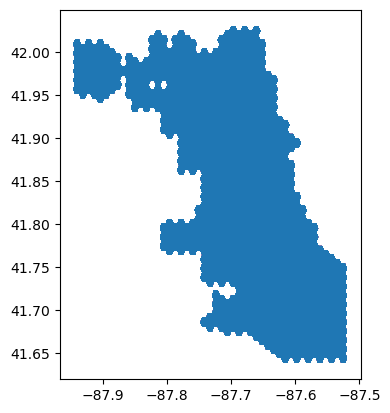

In [16]:
gdf.plot()

In [17]:
# Sorting columns
gdf = gdf.sort_values(by=['GRID_ID', 'year'])
# creating 'is_wave'
gdf["is_wave"] = (gdf["hom_ct"].astype(int) >= 3).astype(int)
# creating 'wave_group'
gdf["wave_group"] = (gdf["is_wave"].shift(fill_value=0) == 0) & (gdf["is_wave"] == 1)
gdf["wave_group"] = gdf["wave_group"].cumsum() * gdf["is_wave"]

In [18]:
wave_metrics = gdf[gdf["is_wave"] == 1].groupby(["GRID_ID", "wave_group"]).agg(
    wave_lifespan=("year", lambda x: x.max() - x.min() + 1),
    wave_amplitude=("hom_ct", "max"),
    wave_start_year=("year", "min")
).reset_index()

In [19]:
wave_metrics.head()

,GRID_ID,wave_group,wave_lifespan,wave_amplitude,wave_start_year
0,AA-10,1,1,3,1928
1,AA-10,2,1,5,1975
2,AA-10,3,2,5,1980
3,AA-10,4,2,4,1984
4,AA-10,5,5,6,1989


In [20]:
wave_frequency = wave_metrics.groupby("GRID_ID").size().reset_index(name="wave_frequency")

wave_frequency.head()

,GRID_ID,wave_frequency
0,AA-10,8
1,AA-11,8
2,AA-12,7
3,AA-13,9
4,AA-14,10


In [21]:
wave_metrics["wave_decade"] = (wave_metrics["wave_start_year"] // 10) * 10
wave_rate_per_decade = wave_metrics.groupby(["GRID_ID", "wave_decade"]).size().reset_index(name="wave_rate")
wave_rate_per_decade = wave_rate_per_decade.groupby("GRID_ID")["wave_rate"].mean().reset_index(name="rate_per_decade")
wave_metrics["wave_amplitude"] = pd.to_numeric(wave_metrics["wave_amplitude"], errors="coerce")

wave_metrics.head(), wave_rate_per_decade.head()

(  GRID_ID  wave_group  wave_lifespan  wave_amplitude  wave_start_year  \
 0   AA-10           1              1               3             1928   
 1   AA-10           2              1               5             1975   
 2   AA-10           3              2               5             1980   
 3   AA-10           4              2               4             1984   
 4   AA-10           5              5               6             1989   
 
    wave_decade  
 0         1920  
 1         1970  
 2         1980  
 3         1980  
 4         1980  ,
   GRID_ID  rate_per_decade
 0   AA-10             1.60
 1   AA-11             2.00
 2   AA-12             1.75
 3   AA-13             2.25
 4   AA-14             1.25)

In [22]:
CURRENT_YEAR = 2017

In [23]:
longest_gaps = wave_metrics.groupby("GRID_ID").agg(
    last_wave_end=pd.NamedAgg(
        column="wave_start_year", 
        aggfunc=lambda x: (x + wave_metrics.loc[x.index, "wave_lifespan"]).max()
    )
).reset_index()

In [24]:
longest_gaps["longest_gap"] = CURRENT_YEAR - longest_gaps["last_wave_end"]
longest_gaps = longest_gaps.sort_values(by="longest_gap", ascending=False)


In [25]:
shapefile = gpd.read_file('Jada_Hexagons/hex_hom_bldg.shp')

In [26]:
shapefile.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry
0,AJ-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.64975, -87.62169 41.644..."
1,AK-37,1874,0.0,4.198223,0.0,"POLYGON ((-87.60968 41.64454, -87.61268 41.639..."
2,AL-37,1874,0.0,0.001777,0.0,"POLYGON ((-87.60067 41.64975, -87.60367 41.644..."
3,AM-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.59165 41.64454, -87.59466 41.639..."
4,AN-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.58264 41.64975, -87.58565 41.644..."


In [27]:
map_data = shapefile.merge(longest_gaps, on="GRID_ID", how="left")

In [28]:
map_data['geometry'] = map_data.geometry.to_crs(epsg=4326)

In [30]:
map_data.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap
0,AJ-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.64975, -87.62169 41.644...",NaN,NaN
1,AK-37,1874,0.0,4.198223,0.0,"POLYGON ((-87.60968 41.64454, -87.61268 41.639...",NaN,NaN
2,AL-37,1874,0.0,0.001777,0.0,"POLYGON ((-87.60067 41.64975, -87.60367 41.644...",1996.0,21.0
3,AM-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.59165 41.64454, -87.59466 41.639...",NaN,NaN
4,AN-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.58264 41.64975, -87.58565 41.644...",NaN,NaN


In [31]:
commarea = gpd.read_file('comm_area_shapefiles/CHI Community Areas.shp')
commarea.geometry = commarea.geometry.to_crs(epsg=4326)

In [32]:
%whos

Variable               Type            Data/Info
------------------------------------------------
CURRENT_YEAR           int             2017
ccrs                   module          <module 'cartopy.crs' fro<...>packages/cartopy/crs.py'>
commarea               GeoDataFrame        AREA  PERIMETER  COMA<...>n\n[77 rows x 10 columns]
df                     DataFrame              GRID_ID  year hom_<...>[110014 rows x 6 columns]
gdf                    GeoDataFrame           GRID_ID  year  hom<...>[110014 rows x 8 columns]
gpd                    module          <module 'geopandas' from <...>s/geopandas/__init__.py'>
highlight_hexagons     GeoDataFrame         GRID_ID  year  hom_c<...>.0  \n7665        117.0  
longest_gaps           DataFrame           GRID_ID  last_wave_en<...>n\n[391 rows x 3 columns]
map_data               GeoDataFrame           GRID_ID  year  hom<...>[110014 rows x 8 columns]
n                      int             14
np                     module          <module 'numpy' f

/tmp/ipykernel_226669/2309917286.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(commarea.geometry.centroid.x,
/tmp/ipykernel_226669/2309917286.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  commarea.geometry.centroid.y,


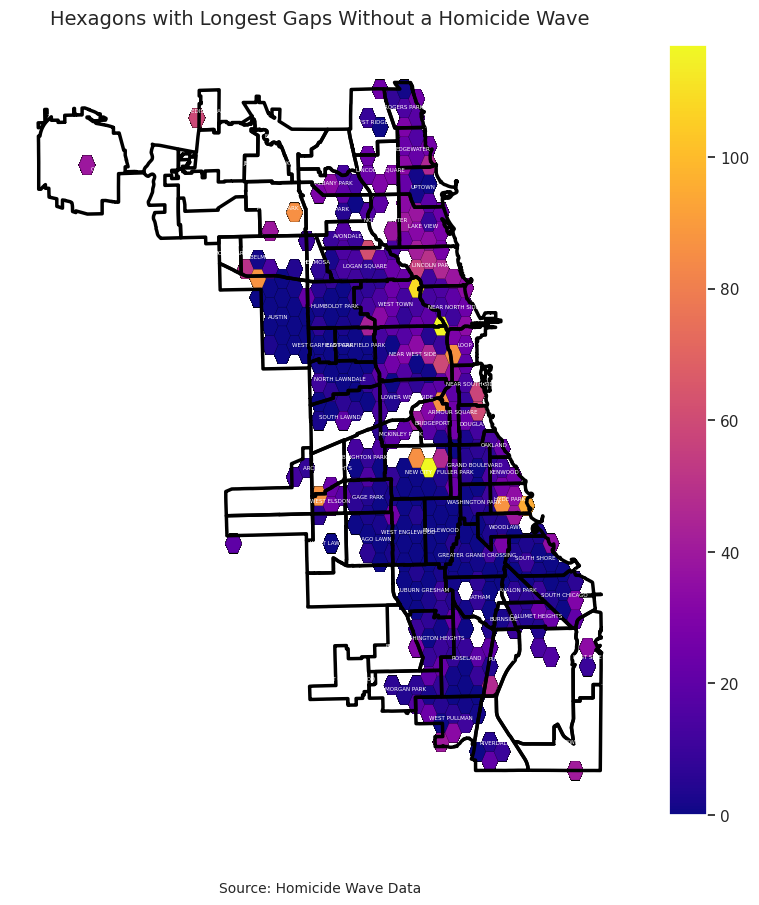

In [126]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all hexagons colored by longest_gap
map_data.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)

# Highlight top hexagons with longest gaps in red
#highlight_hexagons.plot(facecolor="red", edgecolor="black", linewidth=0.2, ax=ax)

# Add labels for highlighted hexagons (GRID_ID)
'''
for x, y, label in zip(highlight_hexagons['geometry'].centroid.x, 
                        highlight_hexagons.geometry.centroid.y, 
                        highlight_hexagons["GRID_ID"]):
    ax.text(x, y, label, fontsize=8, color="white", ha="center", va="center", weight="bold")
    '''

# Plot community boundaries

commarea.plot(facecolor="none", edgecolor="black", linewidth=2.5, ax=ax)

# Add community labels
for x, y, label in zip(commarea.geometry.centroid.x, 
                        commarea.geometry.centroid.y, 
                        commarea["COMMUNITY"]):
    ax.text(x, y, label, fontsize=4, color="white", ha="center", va="center")


# Title & Labels
ax.set_title("Hexagons with Longest Gaps Without a Homicide Wave", fontsize=14, pad=15)
ax.annotate("Source: Homicide Wave Data", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Optional: Add basemap
# ctx.add_basemap(ax, crs=map_data.crs, source=ctx.providers.CartoDB.Positron)

# Show plot
plt.show()

In [87]:
map_data['longest_gap'].describe()

count    52394.000000
mean        14.219949
std         19.280926
min          0.000000
25%          0.000000
50%          7.000000
75%         21.000000
max        117.000000
Name: longest_gap, dtype: float64

In [152]:
outlier = map_data[map_data['longest_gap'] > 60]

In [153]:
[i for i in outlier['GRID_ID'].unique() if i not in anomaly['GRID_ID'].unique()]

['X-23',
 'AF-21',
 'AG-21',
 'AH-18',
 'AI-15',
 'AF-12',
 'S-11',
 'AB-10',
 'AM-23',
 'AO-23']

In [34]:
projects = pd.read_csv('Affordable_Rental_Housing_Developments_20250212.csv') # Loading data found from Chicago Data Portal
# link: https://data.cityofchicago.org/Community-Economic-Development/Affordable-Rental-Housing-Developments-Map/k3g7-7kgc

In [35]:
# making geometry column
projects['geometry'] = projects.apply(
    lambda x: shapely.Point(x.Longitude, x.Latitude),
    axis = 1
)

In [36]:
# convert to geopandas
projects = gpd.GeoDataFrame(projects, geometry='geometry', 
                            crs='EPSG:4326'
                            )

In [37]:
projects.head()

,Community Area Name,Community Area Number,Property Type,Property Name,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location,geometry
0,Avondale,21,Multifamily,Hairpin Lofts,3414 W. Diversey Ave.,60647,773-292-6360,Leasing & Management Co. Inc.,25.0,1153078.890,1918447.998,41.932073,-87.712872,NaN,POINT (-87.71287 41.93207)
1,Loop,32,ARO,1000M,1000 S. Michigan Ave.,60605,312-820-1000,Willow Bridge,23.0,1177375.505,1895971.036,41.869878,-87.624269,NaN,POINT (-87.62427 41.86988)
2,Logan Square,22,ARO,2556 Armtiage LLC,2556 W. Armitage Ave,60647,773-252-0600,North Clybourn Group,1.0,1158751.315,1913231.215,41.917643,-87.692170,"(41.917642826462, -87.6921699562562)",POINT (-87.69217 41.91764)
3,Douglas,35,Multifamily,South Park Plaza,2600 S. King Dr.,60616,312-674-9210,Woodlawn Comm. Dev. Corp.,134.0,1179206.472,1887158.196,41.845653,-87.617816,"(41.8456529117633, -87.6178163910093)",POINT (-87.61782 41.84565)
4,Near West Side,28,ARO,The Rosie,1461 S. Blue Island Ave.,60608,872-259-7452,The FLATS,7.0,1168331.384,1892984.019,41.861881,-87.657558,"(41.86188117554516, -87.65755843617394)",POINT (-87.65756 41.86188)


In [38]:
map_data.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap
0,AJ-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.64975, -87.62169 41.644...",NaN,NaN
1,AK-37,1874,0.0,4.198223,0.0,"POLYGON ((-87.60968 41.64454, -87.61268 41.639...",NaN,NaN
2,AL-37,1874,0.0,0.001777,0.0,"POLYGON ((-87.60067 41.64975, -87.60367 41.644...",1996.0,21.0
3,AM-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.59165 41.64454, -87.59466 41.639...",NaN,NaN
4,AN-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.58264 41.64975, -87.58565 41.644...",NaN,NaN


In [39]:
map_data['GRID_ID'].value_counts()

GRID_ID
AF-1     134
AJ-37    134
AK-37    134
AL-37    134
AM-37    134
        ... 
AS-37    134
AR-37    134
AQ-37    134
AP-37    134
AO-37    134
Name: count, Length: 821, dtype: int64

In [40]:
projects.shape

(598, 15)

In [41]:
map_projects = gpd.sjoin(map_data, projects, predicate='intersects')

In [61]:
map_projects.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap,index_right,Community Area Name,...,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location
9,AS-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.53758 41.64454, -87.54059 41.639...",1976.0,41.0,140,Hegewisch,...,13550 S. Avenue O,60633,773-646-1333,Senior Lifestyle Corp.,116.0,1201038.059,1815487.733,41.648457,-87.540123,"(41.648457411436, -87.5401231660406)"
15,AK-36,1874,0.0,0.800000,0.0,"POLYGON ((-87.60968 41.65495, -87.61268 41.649...",2017.0,0.0,169,Riverdale,...,301 E. 132nd Pl,60627,773-568-7033,Habitat Company,258.0,1180750.042,1817671.924,41.654939,-87.614283,"(41.65493944937772, -87.61428282625099)"
15,AK-36,1874,0.0,0.800000,0.0,"POLYGON ((-87.60968 41.65495, -87.61268 41.649...",2017.0,0.0,296,Riverdale,...,13037 S. Daniel Dr.,60627,773-995-5200,"DRE, Inc.",75.0,1180294.274,1818758.372,41.657931,-87.615917,"(41.6579312533062, -87.6159174009456)"
27,AH-35,1874,0.0,0.784286,0.0,"POLYGON ((-87.63671 41.67056, -87.63972 41.665...",2017.0,0.0,279,West Pullman,...,12045 S. Emerald Ave.,60628,773-568-3000,Source Works Development,90.0,1173523.536,1824810.063,41.674690,-87.640515,"(41.6746900778514, -87.6405148423398)"
48,AH-34,1874,0.0,0.007127,0.0,"POLYGON ((-87.63671 41.68096, -87.63972 41.675...",2012.0,5.0,463,West Pullman,...,825 W. 118th St.,60643,773-568-2929,Source Works Management,70.0,1172827.454,1826559.720,41.679507,-87.643011,"(41.6795067550453, -87.6430113026999)"


In [42]:
map_projects['Community Area Name'].isna().value_counts()

Community Area Name
False    80132
Name: count, dtype: int64

In [43]:
map_projects['GRID_ID'].value_counts()

GRID_ID
AB-16    2814
AA-13    2680
AM-20    1876
AG-6     1742
AC-11    1474
         ... 
AN-25     134
AP-25     134
AN-22     134
AM-21     134
AK-13     134
Name: count, Length: 216, dtype: int64

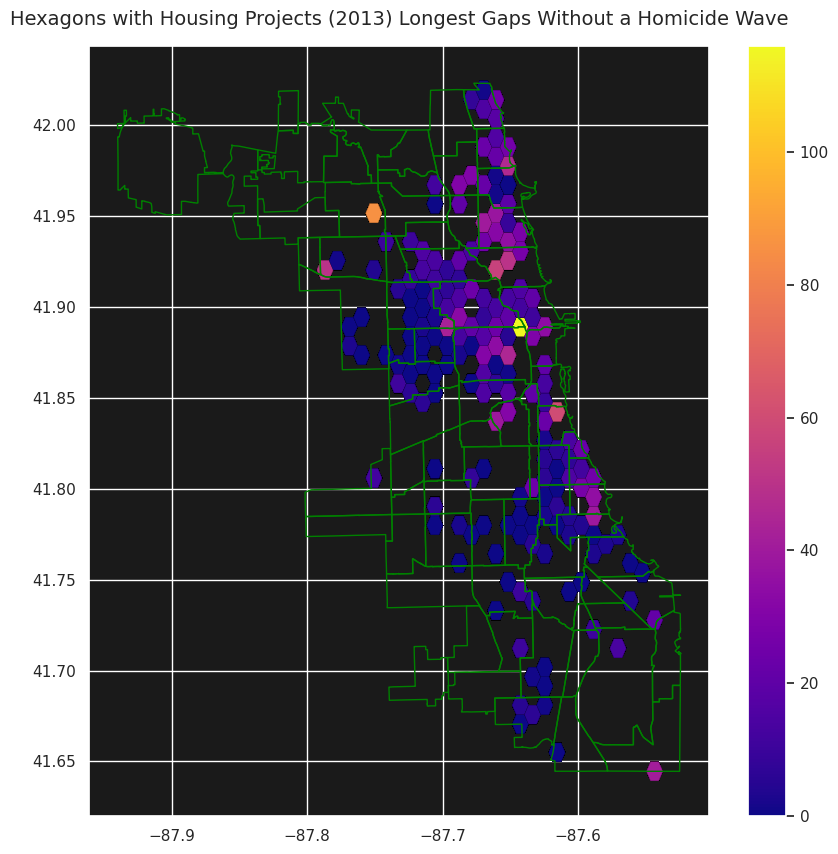

In [148]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all hexagons colored by longest_gap
map_projects.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons with Housing Projects (2013) Longest Gaps Without a Homicide Wave", fontsize=14, pad=15)
#ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

# Plot community boundaries

commarea.plot(facecolor="none", edgecolor="green", linewidth=1, ax=ax)

# Add community labels
'''
for x, y, label in zip(commarea.geometry.centroid.x, 
                        commarea.geometry.centroid.y, 
                        commarea["COMMUNITY"]):
    ax.text(x, y, label, fontsize=6, color="white", ha="center", va="center")'''

plt.show()

In [53]:
map_projects['longest_gap'].describe()

count    74370.000000
mean        10.499099
std         13.073598
min          0.000000
25%          1.000000
50%          6.000000
75%         15.000000
max        116.000000
Name: longest_gap, dtype: float64

In [180]:
anomaly = map_projects[map_projects['longest_gap'] > 36]

In [181]:
anomaly

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap,index_right,Community Area Name,...,Address,Zip Code,Phone Number,Management Company,Units,X Coordinate,Y Coordinate,Latitude,Longitude,Location
9,AS-37,1874,0.0,0.000000,NaN,"POLYGON ((-87.53758 41.64454, -87.54059 41.639...",1976.0,41.0,140,Hegewisch,...,13550 S. Avenue O,60633,773-646-1333,Senior Lifestyle Corp.,116.0,1201038.059,1815487.733,41.648457,-87.540123,"(41.648457411436, -87.5401231660406)"
306,AF-19,1874,1.0,18.369836,0.054437,"POLYGON ((-87.65474 41.83705, -87.65774 41.831...",1978.0,39.0,255,Bridgeport,...,2928 S. Archer Ave.,60608,773-376-2360,Preservation Housing Management LLC,55.0,1168114.670,1885548.333,41.841482,-87.658568,"(41.84148167339779, -87.65856843550151)"
328,AK-18,1874,0.0,0.000000,NaN,"POLYGON ((-87.60968 41.84226, -87.61268 41.837...",1957.0,60.0,3,Douglas,...,2600 S. King Dr.,60616,312-674-9210,Woodlawn Comm. Dev. Corp.,134.0,1179206.472,1887158.196,41.845653,-87.617816,"(41.8456529117633, -87.6178163910093)"
377,AG-15,1874,0.0,7.577510,0.000000,"POLYGON ((-87.64573 41.87348, -87.64873 41.868...",1972.0,45.0,288,Near West Side,...,1125 W. Van Buren St.,66007,312-262-6406,Tandem Property Management,5.0,1168864.113,1898292.938,41.876438,-87.655449,"(41.8764377440362, -87.6554489851593)"
377,AG-15,1874,0.0,7.577510,0.000000,"POLYGON ((-87.64573 41.87348, -87.64873 41.868...",1972.0,45.0,286,Near West Side,...,1050 W. Van Buren St.,60607,312-327-1101,Sage West Loop,16.0,1169278.088,1898384.787,41.876681,-87.653926,"(41.876680801678525, -87.65392634483864)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109811,AG-5,2016,1.0,212.572467,0.004704,"POLYGON ((-87.64573 41.97754, -87.64873 41.972...",1971.0,46.0,417,Uptown,...,4946 N. Sheridan Road,60640,312-447-4621,Mercy Housing,100.0,1168689.933,1933461.587,41.972946,-87.655067,"(41.9729461220532, -87.6550671246698)"
109811,AG-5,2016,1.0,212.572467,0.004704,"POLYGON ((-87.64573 41.97754, -87.64873 41.972...",1971.0,46.0,180,Uptown,...,5009 N. Sheridan Road,60640,317-596-2168,Zidan Management Group,16.0,1168763.559,1933706.921,41.973618,-87.654789,"(41.9736177253694, -87.6547892430962)"
109934,AN-24,2016,1.0,188.789278,0.005297,"POLYGON ((-87.58264 41.78502, -87.58565 41.779...",1978.0,39.0,193,Woodlawn,...,6230 S. Dorchester Ave.,60637,773-288-4202,Woodlawn East Community,84.0,1186573.262,1863816.865,41.781431,-87.591521,"(41.781431130748, -87.5915208532369)"
109934,AN-24,2016,1.0,188.789278,0.005297,"POLYGON ((-87.58264 41.78502, -87.58565 41.779...",1978.0,39.0,135,Woodlawn,...,1410 E. 62nd St.,60637,773-572-5500,The Thresholds,67.0,1186722.404,1864209.572,41.782505,-87.590962,"(41.782505219358, -87.5909616432556)"


In [182]:
anomaly.GRID_ID.unique()

array(['AS-37', 'AF-19', 'AK-18', 'AG-15', 'AB-14', 'AH-14', 'R-11',
       'AF-11', 'AG-10', 'V-8', 'AE-8', 'AF-8', 'AG-5', 'AN-24'],
      dtype=object)

In [144]:
anomaly.index

Index([     9,    306,    328,    377,    377,    391,    397,    441,    441,
          455,
       ...
       109719, 109719, 109719, 109720, 109720, 109811, 109811, 109934, 109934,
       109934],
      dtype='int64', length=3350)

In [139]:
is_touching = anomaly.geometry.intersects(commarea.loc[0,'geometry'])

In [145]:
is_touching[anomaly.index[0]]

np.False_

/tmp/ipykernel_226669/1881595273.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(anomaly.geometry.centroid.x,
/tmp/ipykernel_226669/1881595273.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anomaly.geometry.centroid.y,
/tmp/ipykernel_226669/1881595273.py:18: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  is_touching = commarea.geometry.int

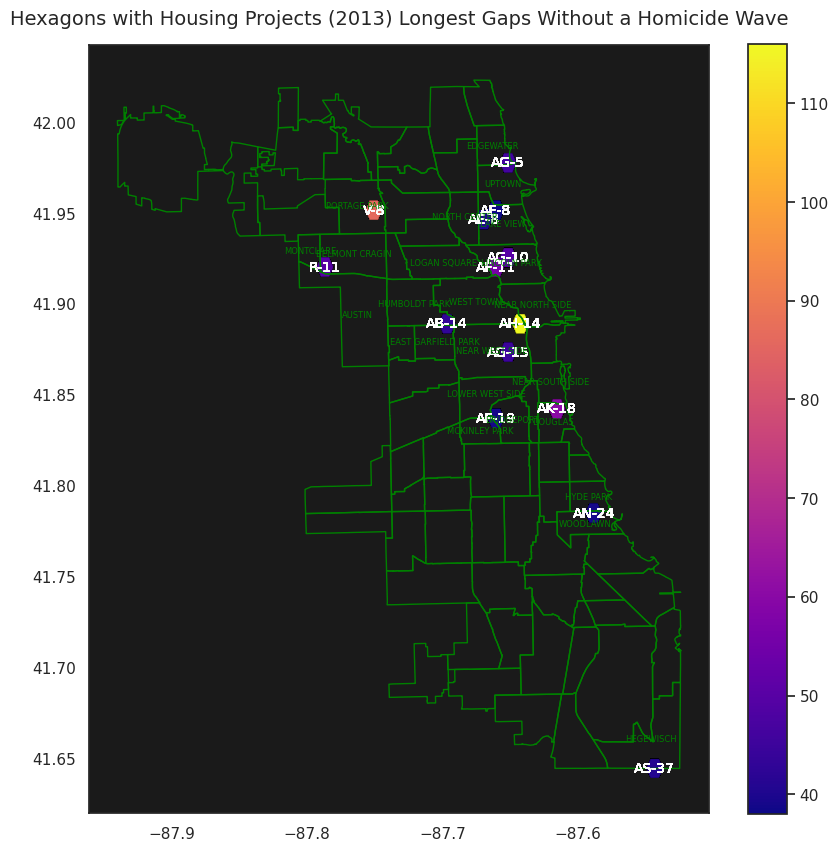

In [187]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_style(rc={'axes.facecolor':'k', 'figure.facecolor': 'white'})

# Plot all hexagons colored by longest_gap
anomaly.plot(column="longest_gap", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons with Housing Projects (2013) Longest Gaps Without a Homicide Wave", fontsize=14, pad=15)

for x, y, label in zip(anomaly.geometry.centroid.x, 
                        anomaly.geometry.centroid.y, 
                        anomaly["GRID_ID"]):
    ax.text(x, y, label, fontsize=10, color="white", ha="center", va="center", weight="normal")
#ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

commarea.plot(facecolor="none", edgecolor="green", linewidth=1, ax=ax)

is_touching = commarea.geometry.intersects(anomaly.geometry)

# Filter for communities that intersect with anomaly hexagons
commarea_intersecting = commarea[commarea.geometry.apply(lambda g: anomaly.geometry.intersects(g).any())]

# Add labels for only the intersecting communities
for x, y, label in zip(commarea_intersecting.geometry.centroid.x, 
                        commarea_intersecting.geometry.centroid.y, 
                        commarea_intersecting["COMMUNITY"]):
    ax.text(x, y, label, fontsize=6, color="green", ha="center", va="center")

plt.show()

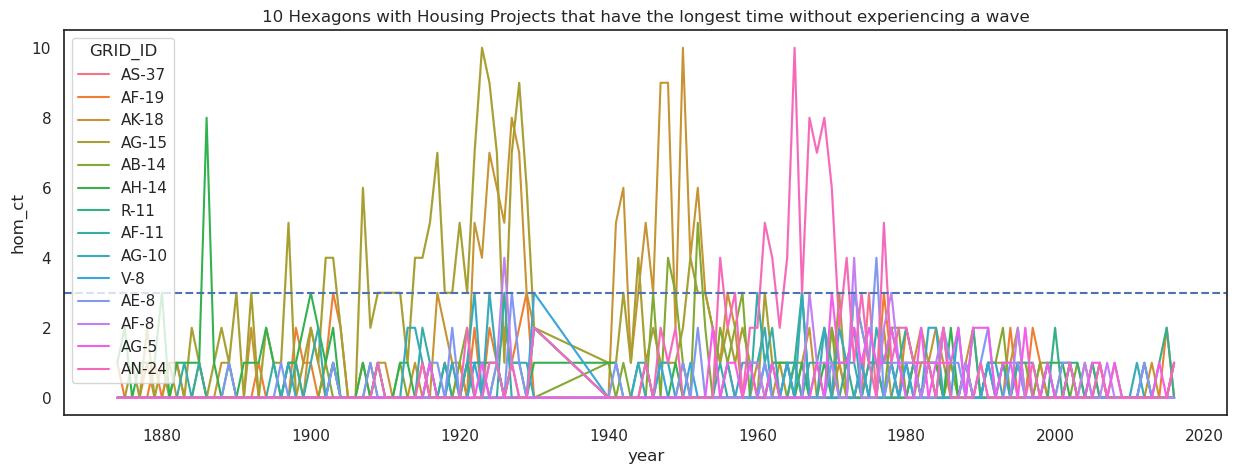

In [183]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='year',
             y='hom_ct',
             hue='GRID_ID',
             data=anomaly,)

plt.title('10 Hexagons with Housing Projects that have the longest time without experiencing a wave')

plt.axhline(y=3, linestyle='--', label='homicide count = 3')

In [155]:
map_data.year.unique()

array([1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884,
       1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016], dtype=int32)

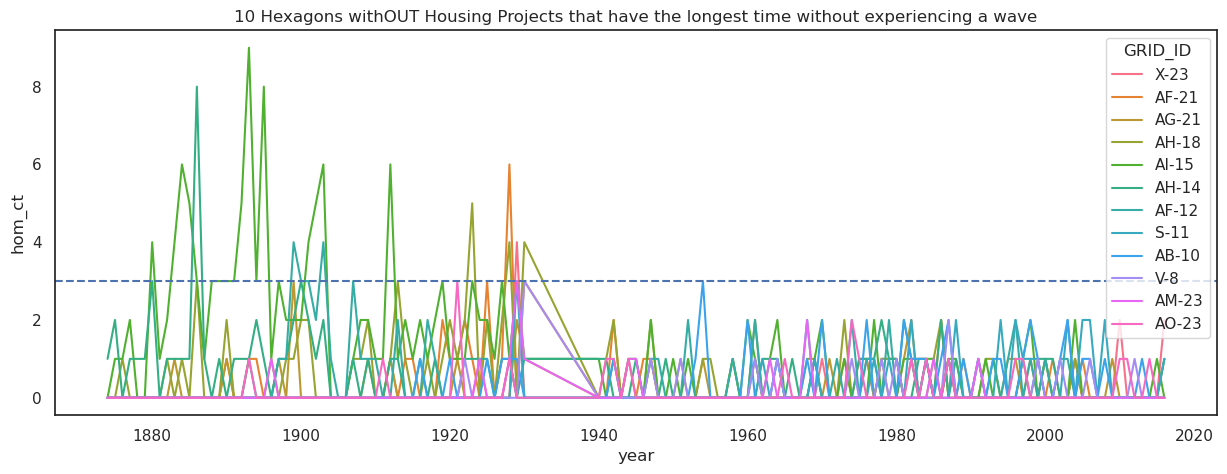

In [178]:
sns.set_theme(style='white')

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='year',
             y='hom_ct',
             hue='GRID_ID',
             data=outlier,)

plt.title('10 Hexagons withOUT Housing Projects that have the longest time without experiencing a wave')
sns.color_palette('deep')
plt.axhline(y=3, linestyle='--', label='homicide count = 3')

In [204]:
# max and minimum amplitude of wave
wave_metrics['max_amp'] = wave_metrics.apply(
    lambda x: wave_metrics['wave_amplitude'].groupby(wave_metrics['GRID_ID']).max()[x['GRID_ID']],
    axis=1
)
wave_metrics['min_amp'] = wave_metrics.apply(
    lambda x: wave_metrics['wave_amplitude'].groupby(wave_metrics['GRID_ID']).min()[x['GRID_ID']],
    axis=1
)

In [205]:
wave_metrics['max_amp'].describe()

count    2824.000000
mean        8.481586
std         3.855936
min         3.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        25.000000
Name: max_amp, dtype: float64

In [230]:
top_amp = wave_metrics[wave_metrics['max_amp']>19]
top_amp = map_data[map_data['GRID_ID'].isin(top_amp['GRID_ID'].unique())]

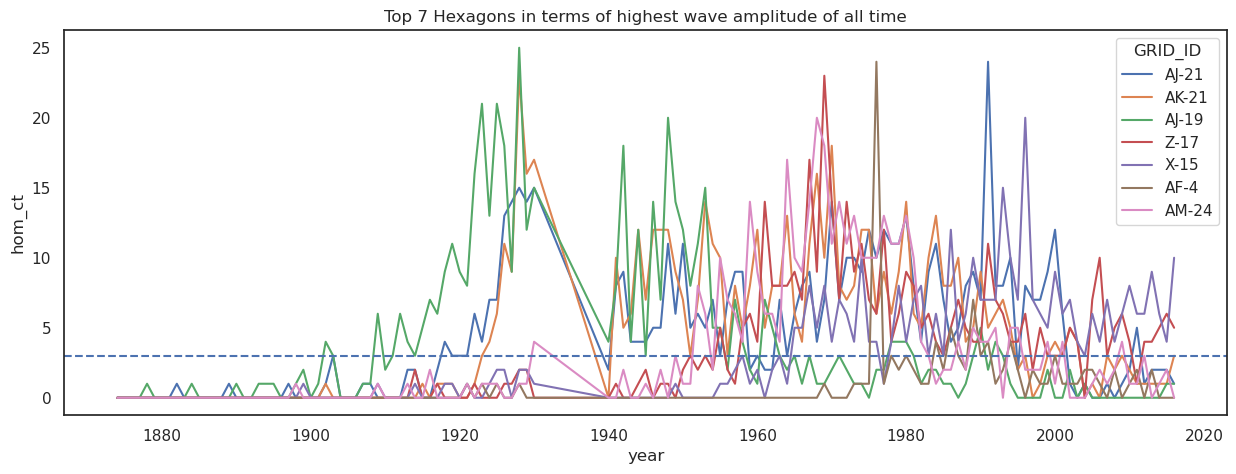

In [222]:
sns.set_theme(style='white')

fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(x='year',
             y='hom_ct',
             hue='GRID_ID',
             data=top_amp,)

plt.title('Top 7 Hexagons in terms of highest wave amplitude of all time')
sns.color_palette('deep')
plt.axhline(y=3, linestyle='--', label='homicide count = 3')

In [231]:
top_amp['max_amp'] = top_amp.apply(lambda x:
                            np.max(wave_metrics[wave_metrics.GRID_ID == [x.GRID_ID]]['max_amp']),
                            axis=1)

ValueError: ('Lengths must match to compare', (2824,), (1,))

unique patterns: AF-4, AJ-19, 

In [225]:
top_amp.head()

,GRID_ID,year,hom_ct,bldg_ct,hom_rt,geometry,last_wave_end,longest_gap,max_amp
279,AJ-21,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.81624, -87.62169 41.811...",2012.0,5.0,10.0
280,AK-21,1874,0.0,0.735287,0.0,"POLYGON ((-87.60968 41.81104, -87.61268 41.805...",2017.0,0.0,10.0
310,AJ-19,1874,0.0,0.000000,NaN,"POLYGON ((-87.61869 41.83705, -87.62169 41.831...",1994.0,23.0,9.0
333,Z-17,1874,0.0,0.210504,0.0,"POLYGON ((-87.70881 41.85787, -87.71181 41.852...",2017.0,0.0,6.0
368,X-15,1874,0.0,0.668948,0.0,"POLYGON ((-87.72683 41.87868, -87.72984 41.873...",2017.0,0.0,10.0


/tmp/ipykernel_226669/4020283415.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(top_amp.geometry.centroid.x,
/tmp/ipykernel_226669/4020283415.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top_amp.geometry.centroid.y,
/tmp/ipykernel_226669/4020283415.py:18: UserWarning: The indices of the left and right GeoSeries' are not equal, and therefore they will be aligned (reordering and/or introducing missing values) before executing the operation. If this alignment is the desired behaviour, you can silence this warning by passing 'align=True'. If you don't want alignment and protect yourself of accidentally aligning, you can pass 'align=False'.
  is_touching = commarea.geometry.int

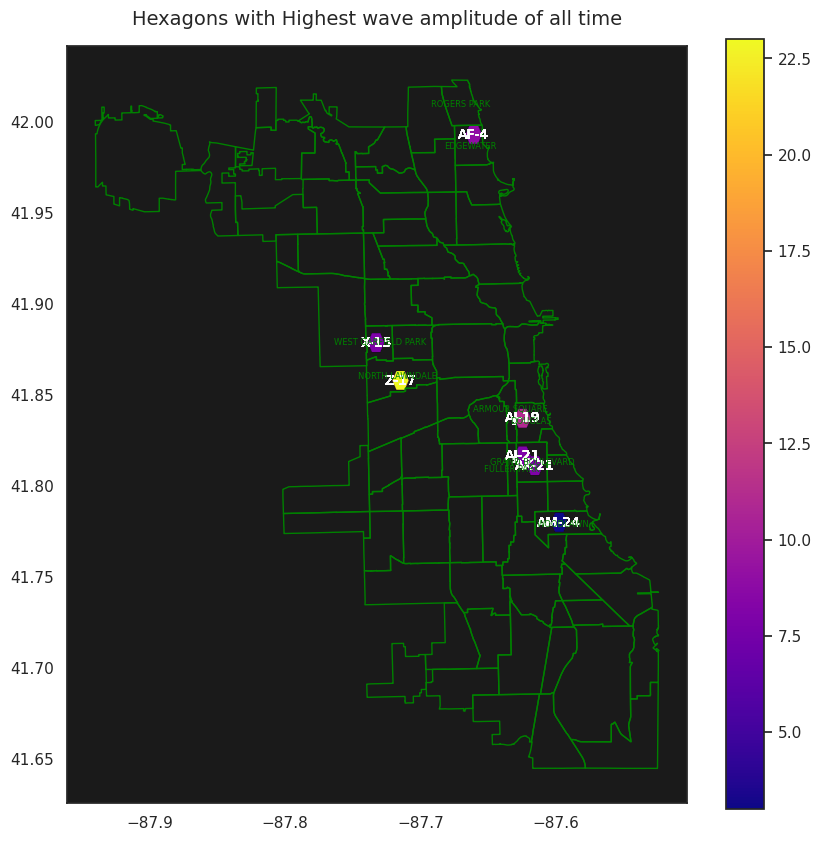

In [224]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_style(rc={'axes.facecolor':'k', 'figure.facecolor': 'white'})

# Plot all hexagons colored by longest_gap
top_amp.plot(column="max_amp", cmap="plasma", edgecolor="black", linewidth=0.1, legend=True, ax=ax)
ax.set_title("Hexagons with Highest wave amplitude of all time", fontsize=14, pad=15)

for x, y, label in zip(top_amp.geometry.centroid.x, 
                        top_amp.geometry.centroid.y, 
                        top_amp["GRID_ID"]):
    ax.text(x, y, label, fontsize=10, color="white", ha="center", va="center", weight="normal")
#ax.annotate("Note: Hexagons where bldg_ct = 0 have been excluded in this visualization", xy=(0.5, -0.1), xycoords="axes fraction", ha="center", fontsize=10)

commarea.plot(facecolor="none", edgecolor="green", linewidth=1, ax=ax)

is_touching = commarea.geometry.intersects(top_amp.geometry)

# Filter for communities that intersect with anomaly hexagons
commarea_intersecting = commarea[commarea.geometry.apply(lambda g: top_amp.geometry.intersects(g).any())]

# Add labels for only the intersecting communities
for x, y, label in zip(commarea_intersecting.geometry.centroid.x, 
                        commarea_intersecting.geometry.centroid.y, 
                        commarea_intersecting["COMMUNITY"]):
    ax.text(x, y, label, fontsize=6, color="green", ha="center", va="center")

plt.show()